In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

read data

In [ ]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1) Pada data Customer Churn, ada kolom PaymentMethod.


a. Munculkan jumlah setiap kategori dari kolom PaymentMethod dalam bentuk dataframe


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data_PM = pd.pivot_table(data, index='PaymentMethod')
data_PM

,MonthlyCharges,SeniorCitizen,tenure
PaymentMethod,,,
Bank transfer (automatic),67.192649,0.150907,43.656736
Credit card (automatic),66.512385,0.145204,43.269382
Electronic check,76.255814,0.251163,25.174630
Mailed check,43.917060,0.058313,21.830025


b. Munculkan persentase (proporsi) setiap kategori dari kolom PaymentMethod dalam bentuk bar chart

In [ ]:
proportion  = pd.DataFrame(data['PaymentMethod'].value_counts(normalize=True))
proportion = proportion.rename(columns={'PaymentMethod':'Proportion'})
display(proportion)

,Proportion
Electronic check,0.335794
Mailed check,0.228880
Bank transfer (automatic),0.219225
Credit card (automatic),0.216101


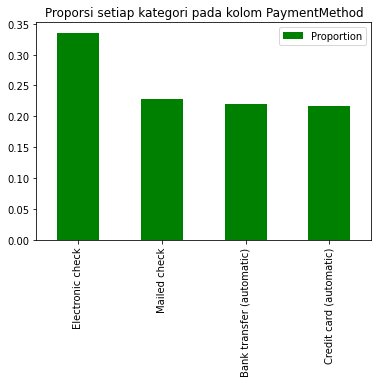

In [ ]:
proportion.plot(kind='bar', color=['green'])
plt.title("Proporsi setiap kategori pada kolom PaymentMethod");

2) Pada data credit Customer Churn, ada kolom Tenure:

a. Buatlah fungsi untuk membuat interval tenure setiap 10 (1-10, 11-20, 21-30 ... dst) lalu buat columns baru bernama interval_tenure. Lalu Munculkan jumlah customer setiap interval interval_tenure dari interval_tenure dalam bentuk dataframe 

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
def fungsi(tenure):
  if tenure <= 10:
    return "1 to 10"
  elif 11 <= tenure <= 20:
    return "11 to 20"
  elif 21 <= tenure <= 30:
    return "21 to 30"
  elif 31 <= tenure <= 40:
    return "31 to 40"
  elif 41 <= tenure <= 50:
    return "41 to 50"
  elif 51 <= tenure <= 60:
    return "51 to 60"
  elif 61 <= tenure <= 70:
    return "61 to 70"
  elif 71 <= tenure <= 80:
    return "71 to 80"

data['Interval Tenure'] = data['tenure'].apply(fungsi)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Interval Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 to 10
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,31 to 40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 to 10
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,41 to 50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 to 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,21 to 30
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,71 to 80
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11 to 20
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1 to 10


In [ ]:
df1 = pd.pivot_table(data, index=['customerID','Interval Tenure'], aggfunc='sum')
df1

,,MonthlyCharges,SeniorCitizen,tenure
customerID,Interval Tenure,,,
0002-ORFBO,1 to 10,65.60,0,9
0003-MKNFE,1 to 10,59.90,0,9
0004-TLHLJ,1 to 10,73.90,0,4
0011-IGKFF,11 to 20,98.00,1,13
0013-EXCHZ,1 to 10,83.90,1,3
...,...,...,...,...
9987-LUTYD,11 to 20,55.15,0,13
9992-RRAMN,21 to 30,85.10,0,22
9992-UJOEL,1 to 10,50.30,0,2


In [ ]:
df2 = data.groupby(['Interval Tenure']).agg(count_customer = ('customerID','count'))
total_cust = df2['count_customer'].sum(axis=0, skipna = True)
df2['Percentage'] = (df2.iloc[0:8]['count_customer']/total_cust)*100
df2.head()

,count_customer,Percentage
Interval Tenure,,
1 to 10,1970,27.971035
11 to 20,908,12.892233
21 to 30,763,10.833452
31 to 40,645,9.158029
41 to 50,652,9.257419


b. Munculkan persentase setiap kategori interval_tenure dalam bentuk bar chart

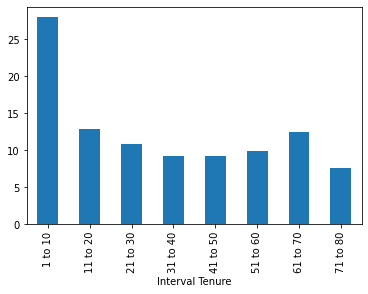

In [ ]:
df2['Percentage'].plot(kind='bar')

c. Munculkan persentase setiap kategori interval_tenure dalam bentuk pie chart

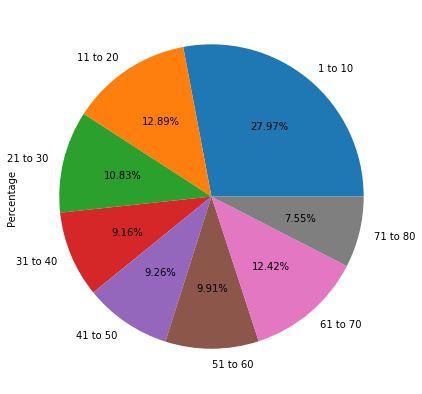

In [ ]:
df2['Percentage'].plot(kind='pie',figsize=(12,7), autopct='%1.2f%%')

d. Dari bar chart dan pie chart yang dibuat, mana yang menurut kamu lebih baik untuk mengkomunikasikan datanya. Berikan alasannya.

jawab : menurut saya lebih baik menggunakan pie chart dikarenakan mudah untuk dianalisis dan lebih menarik secara visual.

3) Pada data Customer Churn, ada kolom MonthlyCharges dan Churn

a. Munculkan jumlah total Monthly Charge berdasarkan Status Churn masing-masing


In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Interval Tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 to 10
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,31 to 40
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 to 10
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,41 to 50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 to 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,21 to 30
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,71 to 80
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,11 to 20
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1 to 10


In [ ]:
jumlah_month = data.groupby(['Churn']).agg(total_monthly = ('MonthlyCharges','count'))
jumlah_month

,total_monthly
Churn,
No,5174
Yes,1869


In [ ]:
def function(MonthlyCharges):
  if MonthlyCharges <= 40:
    return "1 to 40"
  elif 41 <= MonthlyCharges <= 80:
    return "41 to 80"
  else:
    return "more than 80"

data['IntervalMonthlyCharges'] = data['MonthlyCharges'].apply(function)

In [ ]:
new_df2 = data.groupby(['IntervalMonthlyCharges','Churn']).agg(total_monthly = ('MonthlyCharges','sum'))
new_df2

total_monthly
IntervalMonthlyCharges Churn               
1 to 40                No          36661.65
                       Yes          5383.20
41 to 80               No         110059.95
                       Yes         47995.50
more than 80           No         170264.15
                       Yes         85752.15

b. Munculkan jumlah seperti data 2a dalam bentuk pie chart seperti contoh.


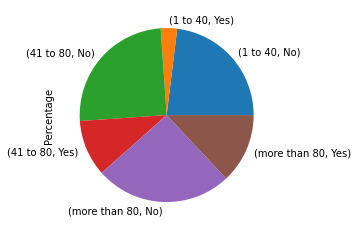

In [ ]:
#Pie Chart persentase
new_df3 = data.groupby(['IntervalMonthlyCharges','Churn']).agg(count_monthly = ('MonthlyCharges','count'))
total_month = new_df3['count_monthly'].sum(axis = 0,skipna = True)
new_df3['Percentage'] = (new_df3['count_monthly']/total_month)*100
new_df3['Percentage'].plot(kind='pie')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f085dc4d410>],
      dtype=object)

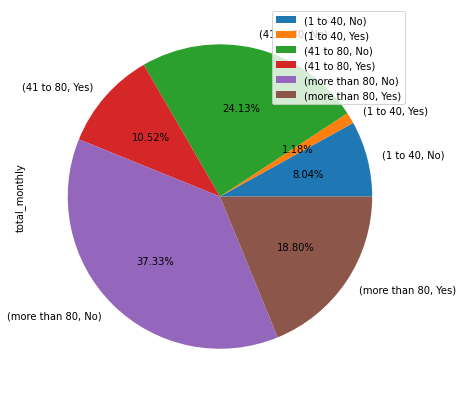

In [ ]:
#Pie Chart IntervalMonthlyCharges
new_df2.plot(kind='pie',figsize=(12,7),subplots=True,autopct='%1.2f%%')

c. Pisahkan data Monthly Charge berdasarkan status Churn (Yes / No)


In [ ]:
Churn_Yes = data[data['Churn'] == 'Yes']
Churn_No = data[data['Churn'] == 'No']

d. Buatlah Histogram distribusi MonthlyCharge untuk masing-masing status Churn (jadi aka nada 2 buah histogram)


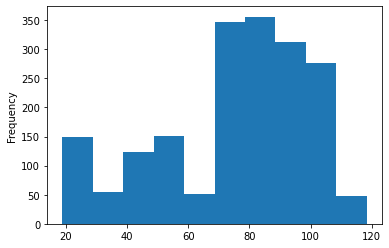

In [ ]:
Churn_Yes['MonthlyCharges'].plot(kind='hist')

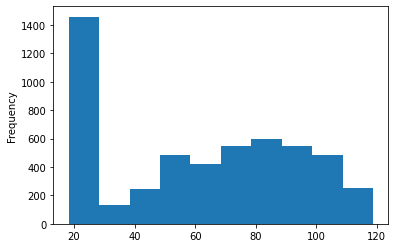

In [ ]:
Churn_No['MonthlyCharges'].plot(kind='hist')

e. Ambil kesimpulan dari visualisasi b dan d.

jawab : visualisasi b dengan menggunakan pie chart lebih baik dikarenakan mudah untuk dianalisis dan lebih menarik secara visual.